---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [3]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    data = pd.read_csv('fraud_data.csv')
    percent = len(data[data['Class'] == 1]) / len(data)
    return percent

# answer_one()

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    y_predict = dummy.predict(X_test)

    accuracy = dummy.score(X_test, y_test)
    recall = recall_score(y_test, y_predict)
    return accuracy, recall
    
# answer_two()

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_predict = svm.predict(X_test)

    accuracy = svm.score(X_test, y_test)
    
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)

    return accuracy, recall, precision

# answer_three()

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [8]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    svm_scores = svm.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, svm_scores)
    
    return confusion

# answer_four()

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [9]:
def answer_five():      
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
#     import matplotlib.pyplot as plt

    # Set up classifier and get needed values
    lr = LogisticRegression().fit(X_train, y_train)
    y_proba_lr = lr.predict_proba(X_test)[:,1]

    precision, recall, _ = precision_recall_curve(y_test, y_proba_lr)
    fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
    roc_auc_lr = auc(fpr, tpr)

    # Find Recall when Precision equals 0.75
    for p, r in zip(precision, recall):
        if p == 0.75:
            answer_recall = r

    # Find TPR when FPR equals 0.16
    for f, t in zip(fpr, tpr):
        if round(f, 2) == 0.16:
            answer_tpr = t

    return answer_recall, answer_tpr

    ### PLOTS
    
    # # Plot Precision-recall Curve
    # plt.figure(figsize=(8,8))

    # plt.xlim([0.0, 1.01])
    # plt.ylim([0.0, 1.01])
    # plt.plot(precision, recall, label='Precision-Recall Curve')
    # # plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
    # plt.xlabel('Precision', fontsize=16)
    # plt.ylabel('Recall', fontsize=16)
    # plt.title('Precision-recall Curve', fontsize=16)
    # plt.axes().set_aspect('equal')
    # plt.show()

    # # Plot ROC Curve
    # plt.xlim([-0.01, 1.00])
    # plt.ylim([-0.01, 1.01])
    # plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    # plt.xlabel('False Positive Rate', fontsize=16)
    # plt.ylabel('True Positive Rate', fontsize=16)
    # plt.title('ROC Curve', fontsize=16)
    # plt.legend(loc='lower right', fontsize=13)
    # plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    # plt.axes().set_aspect('equal')
    # plt.show()  
    
# answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [11]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}

    grid = GridSearchCV(lr, param_grid=grid_values, scoring='recall', cv=3)
    grid.fit(X_train, y_train)
    results = grid.cv_results_
    # for i in results['params']:
    #     print(i)

    data = np.vstack((results['split0_test_score'], 
                      results['split1_test_score'], 
                      results['split2_test_score']))
    means = np.mean(data, axis=0).reshape((5,2), order='C')

    return means

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


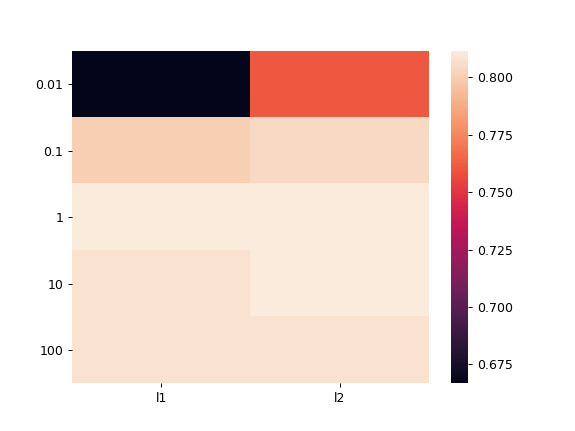

In [12]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())